In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# **Aim of the Dataset**

* The aim of the IRIS dataset is to explore and analyze how the sepal width, sepal length, petal width, and petal length are distributed across the three different Iris flower species (Iris setosa, Iris versicolor, and Iris virginica). This dataset is often used to illustrate various data visualization techniques and machine learning algorithms, particularly classification methods.

# **Installing Pandas_Profiling**

In [2]:
# pip install pandas-profiling

# **Import Required Libraries**

In [3]:
import os
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'/kaggle/input/iris/Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Advanced EDA - pandas profilling**

In [6]:
import pandas as pd
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')
profile = ProfileReport(df, title="df", html={'style': {'full_width': True}})



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# NOTE: I have conducted both Advanced Exploratory Data Analysis (EDA) and manual EDA on the dataset. You are welcome to choose either approach wisely.( But be always a good acumen) ::))

#checking if there is any inconsistency in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#As we see there are no null values in the dataset, so the data can be processed

In [9]:
# drop the insignificant column
df.drop('Id', axis=1, inplace=True)

# **Exploratory Data Analysis With Iris**

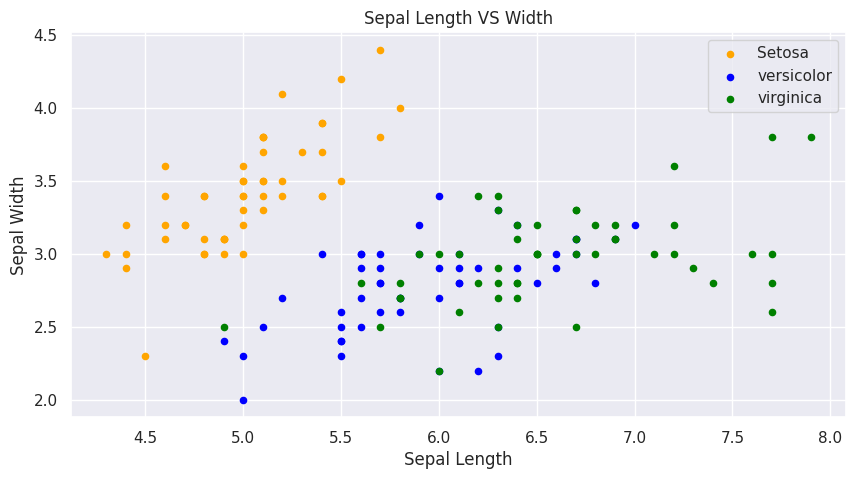

In [10]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

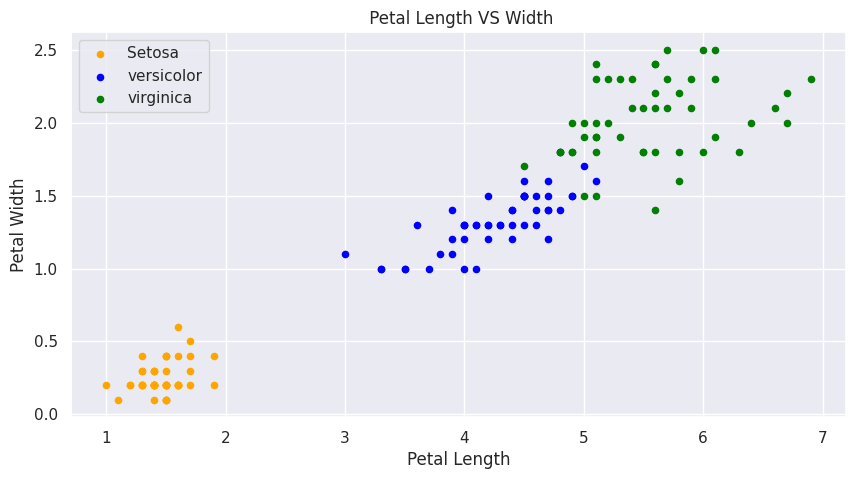

In [11]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal

# Plot the Histogram -For How leanth and width are distributed on Iris

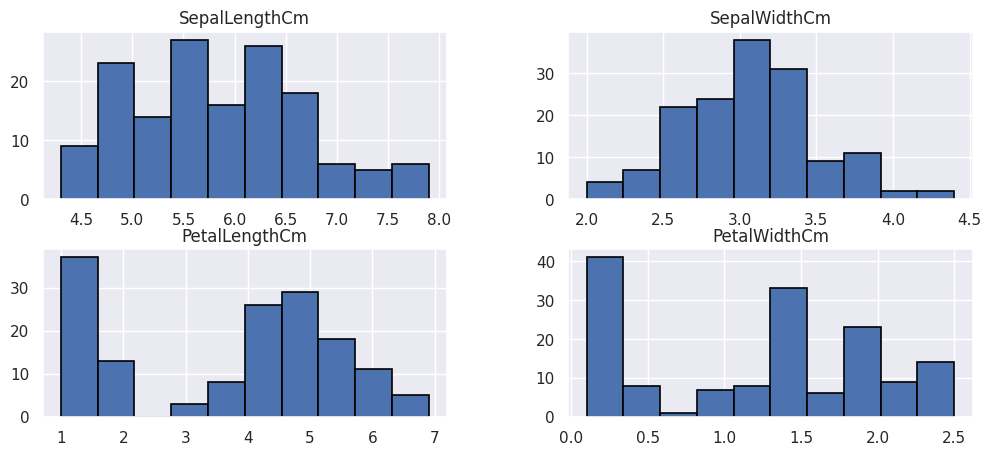

In [12]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,5)

# Now let us see how the length and width vary according to the species

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

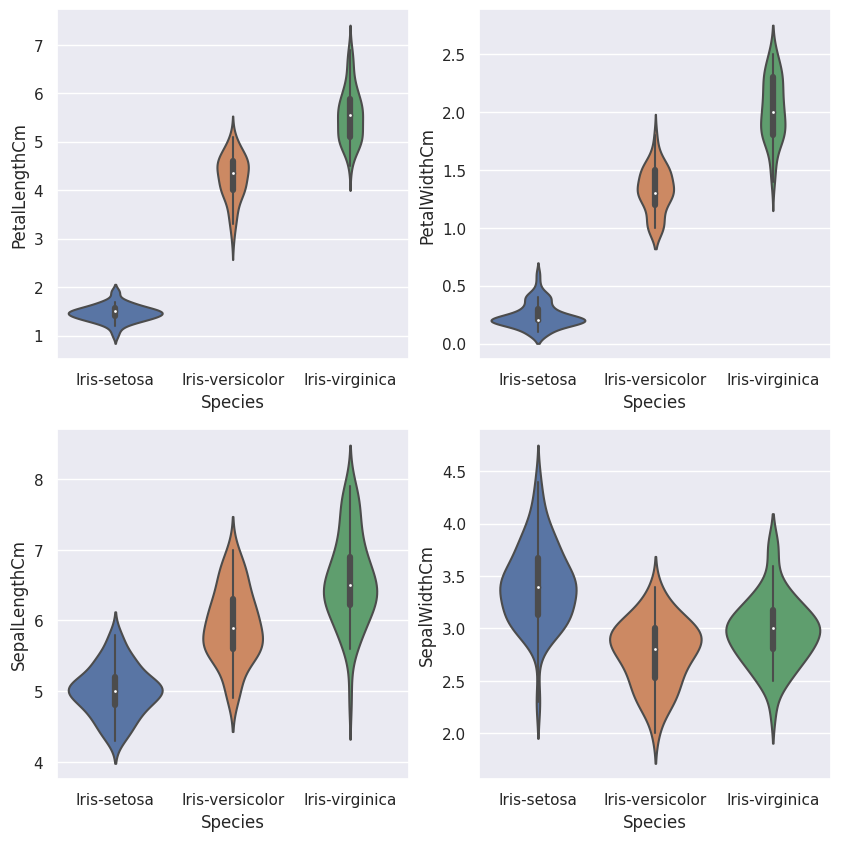

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.¶
Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

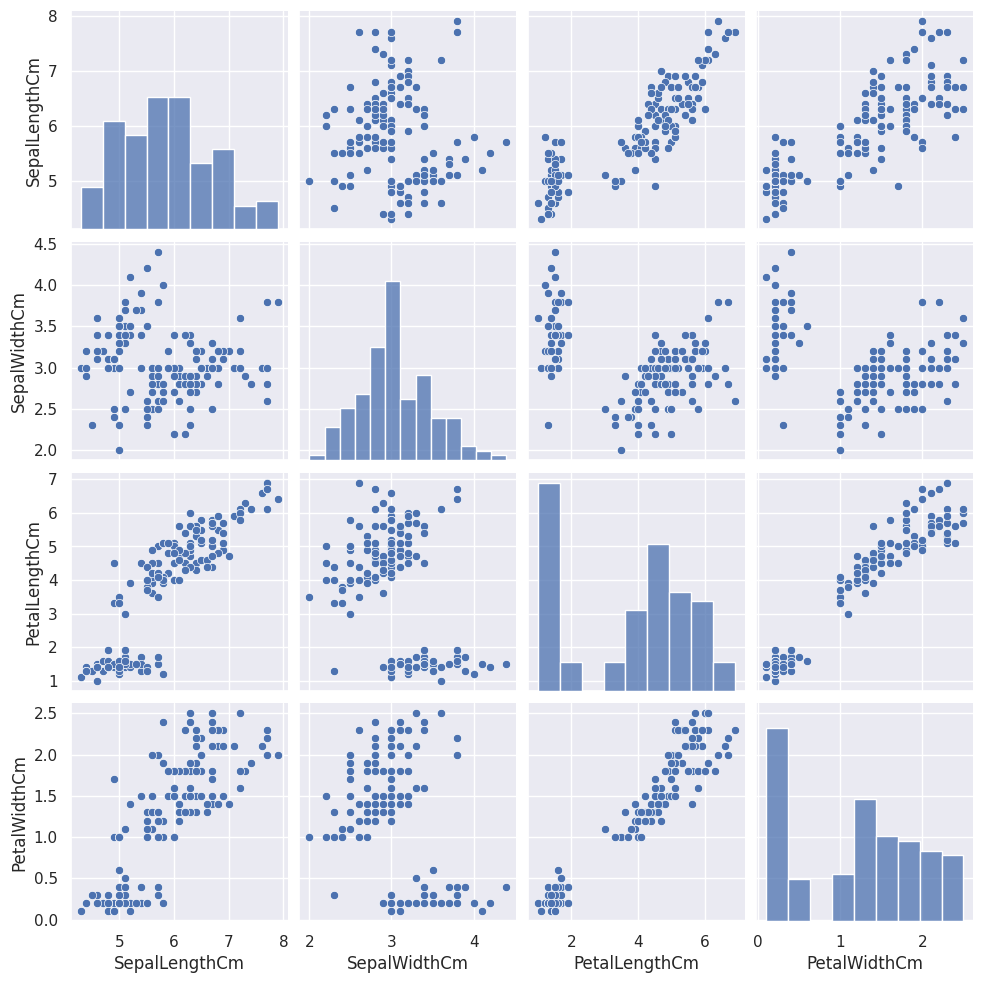

In [14]:
sns.pairplot(df)

In [15]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import cross_validate #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [16]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [22]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']]

In [24]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


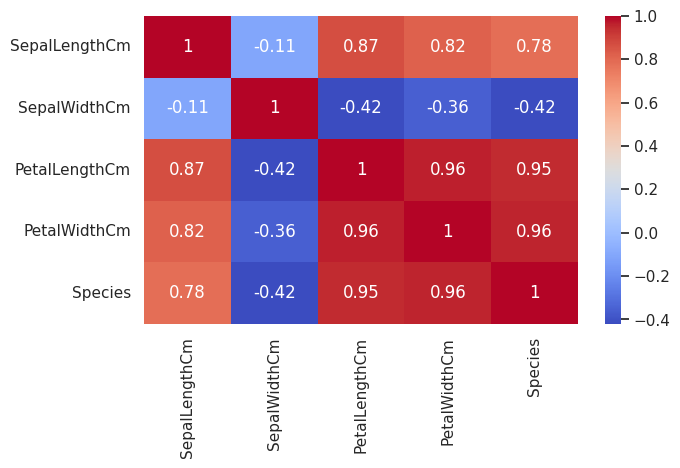

In [25]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# Split the data into Depe and Indep 

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

# Split the data into train and test for model building

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building Logistic Regression with Multiclass classification

# **OVR or OVA**

NOTE: you can use either any one - **multi_class**** : {'auto', 'ovr', 'multinomial'}**

In [30]:

logit_ovr = LogisticRegression(multi_class='multinomial')
logit_ovr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [31]:
# predict
y_pred_ovr_train = logit_ovr.predict(X_train)
y_pred_ovr_test = logit_ovr.predict(X_test)

In [32]:
# Evaluate the Model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred_ovr_train))
print()
print(confusion_matrix(y_test, y_pred_ovr_test))

[[39  0  0]
 [ 0 35  2]
 [ 0  0 44]]

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_ovr_train))
print()
print(classification_report(y_test, y_pred_ovr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.95      0.97        37
           2       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_ovr_train))
print()
print(accuracy_score(y_test, y_pred_ovr_test))

0.9833333333333333

0.9666666666666667


In [35]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_ovr, X_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_ovr, X_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

Train Accuracy [1.         0.91666667 1.         0.91666667 1.         0.91666667
 1.         1.         0.91666667 1.        ]

Train Mean Accuracy 0.9666666666666666

Train Max Accuracy 1.0

Test Accuracy [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.66666667]

Test Mean Accuracy 0.9666666666666666

Test Max Accuracy 1.0


Cross_validation_score is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

# Support Vector Machine (SVM)

In [36]:
model = svm.SVC()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.9666666666666667


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [38]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [39]:
dtr.score(X_train,y_train)


0.9812783090085556

In [40]:
dtr.score(X_test,y_test)

0.9381443298969072

# **K-Nearest Neighbours**

In [41]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 1.0


# Let's check the accuracy for various values of n for K-Nearest nerighbours

In [42]:
accuracy_scores = []

In [43]:
k_values = list(range(1, 11))

In [44]:
# Train and evaluate the KNN classifier for each K
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction)
    accuracy_scores.append(accuracy)

In [45]:
# Convert accuracy scores to a pandas Series
a = pd.Series(accuracy_scores, index=k_values)

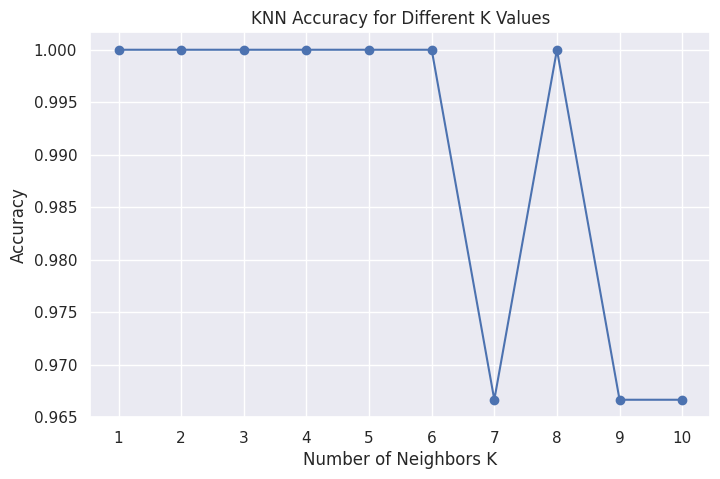

In [46]:
# Plot the accuracy scores
plt.figure(figsize=(8, 5))
plt.plot(a.index, a, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Above is the graph showing the accuracy for the KNN models using different values of n.

# We used all the features of iris in above models. Now we will use Petals and Sepals Seperatel

# Creating Petals And Sepals Training Data

In [47]:
petal=df[['PetalLengthCm','PetalWidthCm','Species']]
sepal=df[['SepalLengthCm','SepalWidthCm','Species']]

In [48]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

# Using Support Vector Machine

In [49]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


# Using Logistic Regression

In [50]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


# **Using Desicion Tree**

In [51]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


# Using K-Nearest Neighbours

In [52]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


# **Conclusion**


Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.